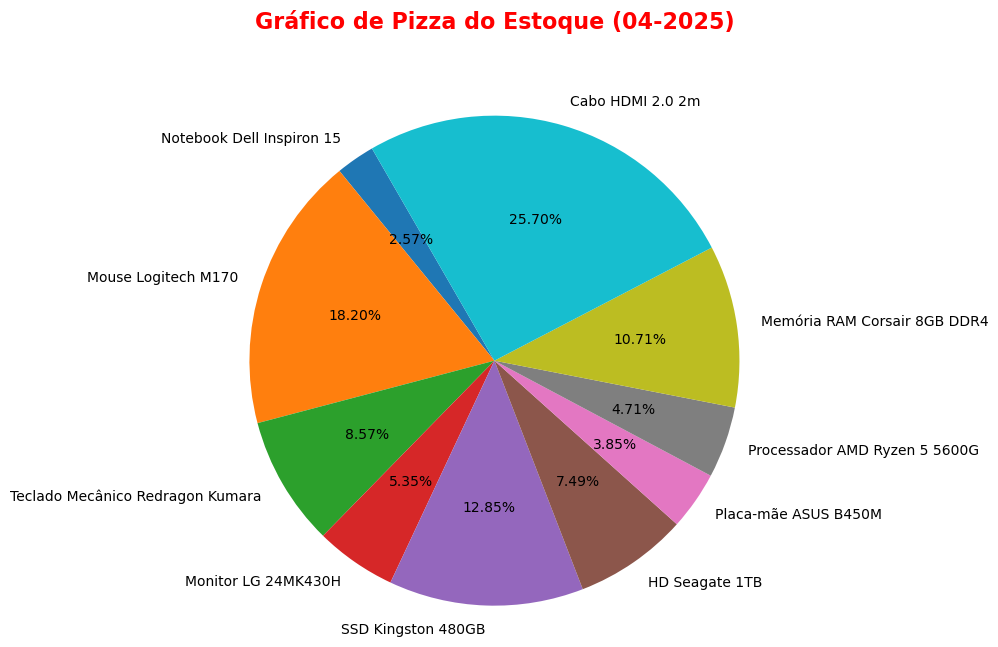

In [25]:
import pandas as pd;
import matplotlib.pyplot as plt;

estoque = pd.read_csv('./data/estoque.csv', sep=',', encoding='utf-8');
log_de_vendas = pd.read_csv('./data/log_vendas.csv', sep=',', encoding='utf-8');

# Gráfico de pizza do estoque
labels = estoque['Nome'];
sizes = estoque['Quantidade em Estoque'];

# Criando o gráfico de pizza
plt.figure(figsize=(10, 7));
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=120);
plt.axis('equal'); # Certifica que a pizza é desenhada como um círculo
plt.title('Gráfico de Pizza do Estoque (04-2025)', fontsize=16, fontweight='bold', color='red', loc='center', pad=45);
plt.show();

/var/folders/mp/tdb94hkn5h949b98nbcdj1dh0000gn/T/ipykernel_43674/3450380559.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_de_vendas_filtrado['Mes'] = log_de_vendas_filtrado['Data da Venda'].dt.month


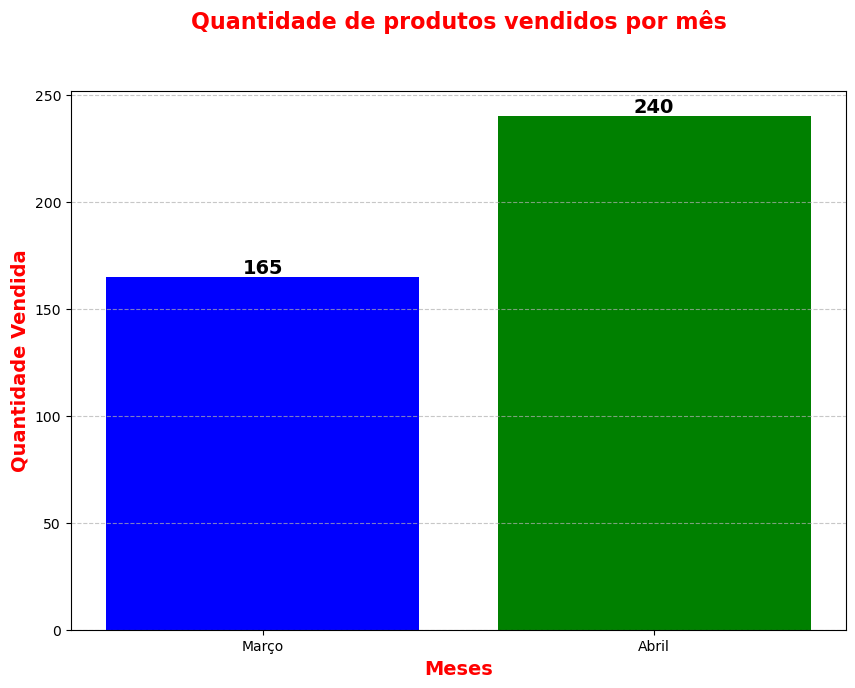

In [33]:
# Gráfico de barras do estoque
log_de_vendas["Data da Venda"] = pd.to_datetime(log_de_vendas["Data da Venda"])
log_de_vendas_filtrado = log_de_vendas[(log_de_vendas["Data da Venda"] >= "2025-03-01")]

# Remove incorrect to_datetime usage
log_de_vendas_filtrado['Mes'] = log_de_vendas_filtrado['Data da Venda'].dt.month
log_de_vendas_filtrado = log_de_vendas_filtrado.groupby("Mes")["Quantidade Vendida"].sum().reset_index()

# Gráfico de barras do volume de vendas dos últimos dois meses
plt.figure(figsize=(10, 7));
plt.title("Quantidade de produtos vendidos por mês", fontsize=16, fontweight='bold', color='red', loc='center', pad=45)
bars = plt.bar(log_de_vendas_filtrado['Mes'], log_de_vendas_filtrado['Quantidade Vendida'], color=["blue", "green"])
plt.xlabel('Meses', fontsize=14, fontweight='bold', color='red')
plt.ylabel('Quantidade Vendida', fontsize=14, fontweight='bold', color='red')

# Setando os nomes dos meses de acordo com o número do mês
month_names = {1: "Janeiro", 2: "Fevereiro", 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
plt.xticks(log_de_vendas_filtrado['Mes'], [month_names[month] for month in log_de_vendas_filtrado['Mes']])
plt.grid(axis='y', linestyle='--', alpha=0.7)



for bar in bars:
  yvalue = bar.get_height();
  plt.text(bar.get_x() + bar.get_width() / 2, yvalue, int(yvalue), ha='center', va='bottom', fontsize=14, fontweight='bold', color='black')  

plt.show()